In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyneb as pn

## Chemico-Physical properties of nebulae: Te, Ne, X$^i$/H$^+$, X/H 

### Te and Ne

Let's create some atoms ;-)

In [2]:
O3 = pn.Atom('O', 3, NLevels=5)
N2 = pn.Atom('N', 2, NLevels=5)
O2 = pn.Atom('O', 2, NLevels=5)
S2 = pn.Atom('S', 2, NLevels=5)

Configurations of the energy levels:

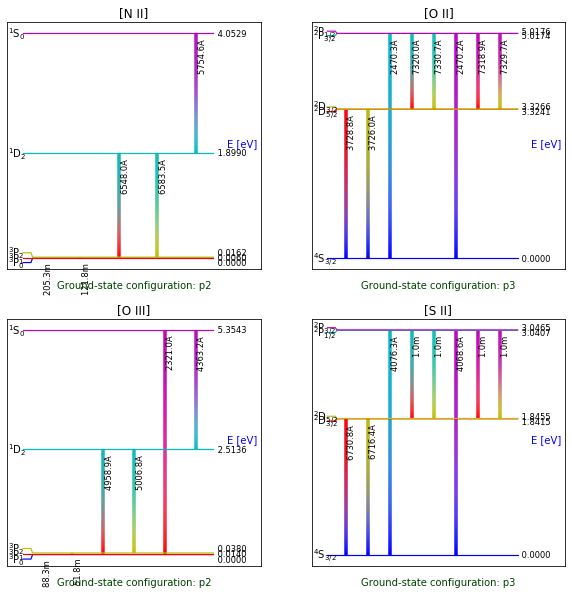

In [3]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
N2.plotGrotrian(ax=ax1)
O2.plotGrotrian(ax=ax2)
O3.plotGrotrian(ax=ax3)
S2.plotGrotrian(ax=ax4)

Which line ratios are Te-diagnostics, Ne-diagnostics?
- [NII] 6584 / 6548
- [NII] 5755 / 6584
- [OIII] 88 / 52 $\mu$m
- [SII] 6730 / 6716
- [OII] 3729 / 3729
- [OII] 3727+ / 7325+
- [SII] 4076 / 4070

others

Let's generate some arrays containing values for electron temperatures and densities:

In [4]:
tem = np.linspace(6000, 16000, 100)
tem1 = 8000
tem2 = 12000
den = np.logspace(1, 5, 100)
den1 = 1e2
den2 = 1e4

We plot the [OIII] 4363/5007 line ration as a function of Te, for different densities.

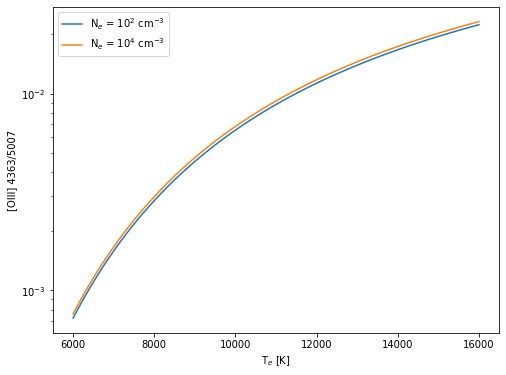

In [5]:
rO3 = O3.getEmissivity(tem=tem, den=den1, wave=4363) / O3.getEmissivity(tem=tem, den=den1, wave=5007)
rO3_2 = O3.getEmissivity(tem=tem, den=den2, wave=4363) / O3.getEmissivity(tem=tem, den=den2, wave=5007)
f, ax = plt.subplots(figsize=(8,6))
ax.plot(tem, rO3, label=r'N$_e$ = 10$^2$ cm$^{-3}$')
ax.plot(tem, rO3_2, label=r'N$_e$ = 10$^4$ cm$^{-3}$')
ax.set_xlabel('T$_e$ [K]')
ax.set_ylabel('[OIII] 4363/5007')
ax.set_yscale('log')
ax.legend();

We plot the [SII] 6730/6716 line ration as a function of Ne, for different temperatures.

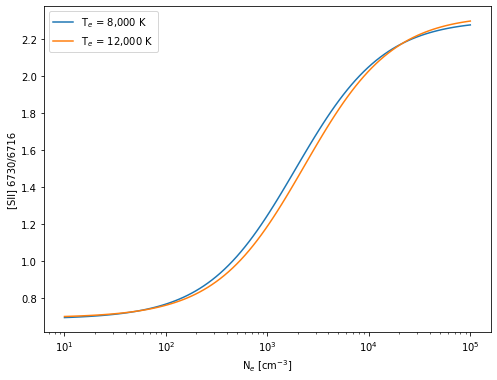

In [6]:
rS2 = S2.getEmissivity(tem=tem1, den=den, wave=6730) / S2.getEmissivity(tem=tem1, den=den, wave=6716)
rS2_2 = S2.getEmissivity(tem=tem2, den=den, wave=6730) / S2.getEmissivity(tem=tem2, den=den, wave=6716)
f, ax = plt.subplots(figsize=(8,6))
ax.plot(den, rS2, label=r'T$_e$ = 8,000 K')
ax.plot(den, rS2_2, label=r'T$_e$ = 12,000 K')
ax.set_xlabel('N$_e$ [cm$^{-3}$]')
ax.set_ylabel('[SII] 6730/6716')
ax.set_xscale('log')
ax.legend();

For the density diagnostic line ratios, some characteristics can easily be obtained

In [7]:
print(S2.getLowDensRatio(wave1=6730, wave2=6716))
print(S2.getHighDensRatio(wave1=6730, wave2=6716))
print(S2.getDensityRange(wave1=6730, wave2=6716, tem=1e4))

0.6666666666666666
2.2585440445044105
[  192.8823772 13440.5966859]


Let's have a llok at the variation of some line ratio when both Te and Ne change

In [8]:
O3_EG = pn.EmisGrid('O', 3)

More options are available

In [9]:
O3_EG = pn.EmisGrid(elem='O', spec=3, n_tem=110, n_den=90, 
                    tem_min=5000., tem_max=20000., den_min=10., 
                    den_max=1e8, restore_file=None, atomObj=None)

One can obtain the emissivity for a given line

In [10]:
O3_5007 = O3_EG.getGrid(wave=5007)

In [11]:
O3_5007.shape

(110, 90)

Or for a line ratio, or any arithmetic combination of lines or level transition

In [12]:
O3_Te = O3_EG.getGrid(to_eval = 'L(4363)/L(5007)')

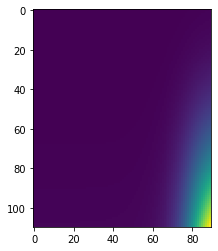

In [13]:
plt.imshow(O3_Te);

Plotting facility is included in the object

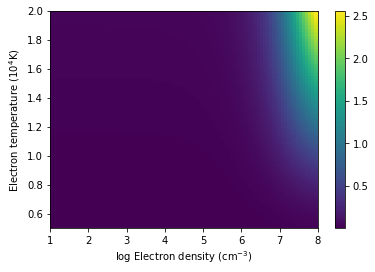

In [14]:
O3_EG.plotImage(to_eval = 'L(4363)/L(5007)')

Even nicer with contourplots:

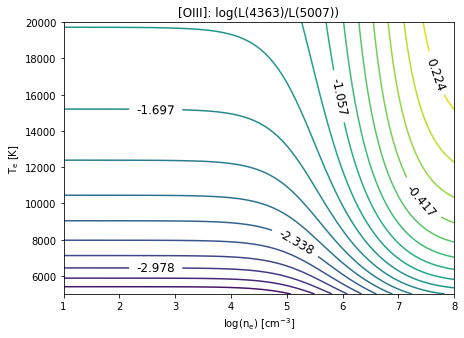

In [15]:
f, ax = plt.subplots(figsize=(7,5))
O3_EG.plotContours(to_eval = 'L(4363)/L(5007)', ax=ax)
# One can save the result to hang it over the desk
f.savefig('OIII_diag.pdf')

This is very important plot. It shows where the line ratio is a diagnostic and where itis not.

warng EmisGrid: diag (L(3726)+L(3729))/(B("7319A+")+B("7330A+")) not found
warng EmisGrid: diag (B("1664A+"))/L(5007) not found
warng EmisGrid: diag B("1400A+")/L(259000) not found


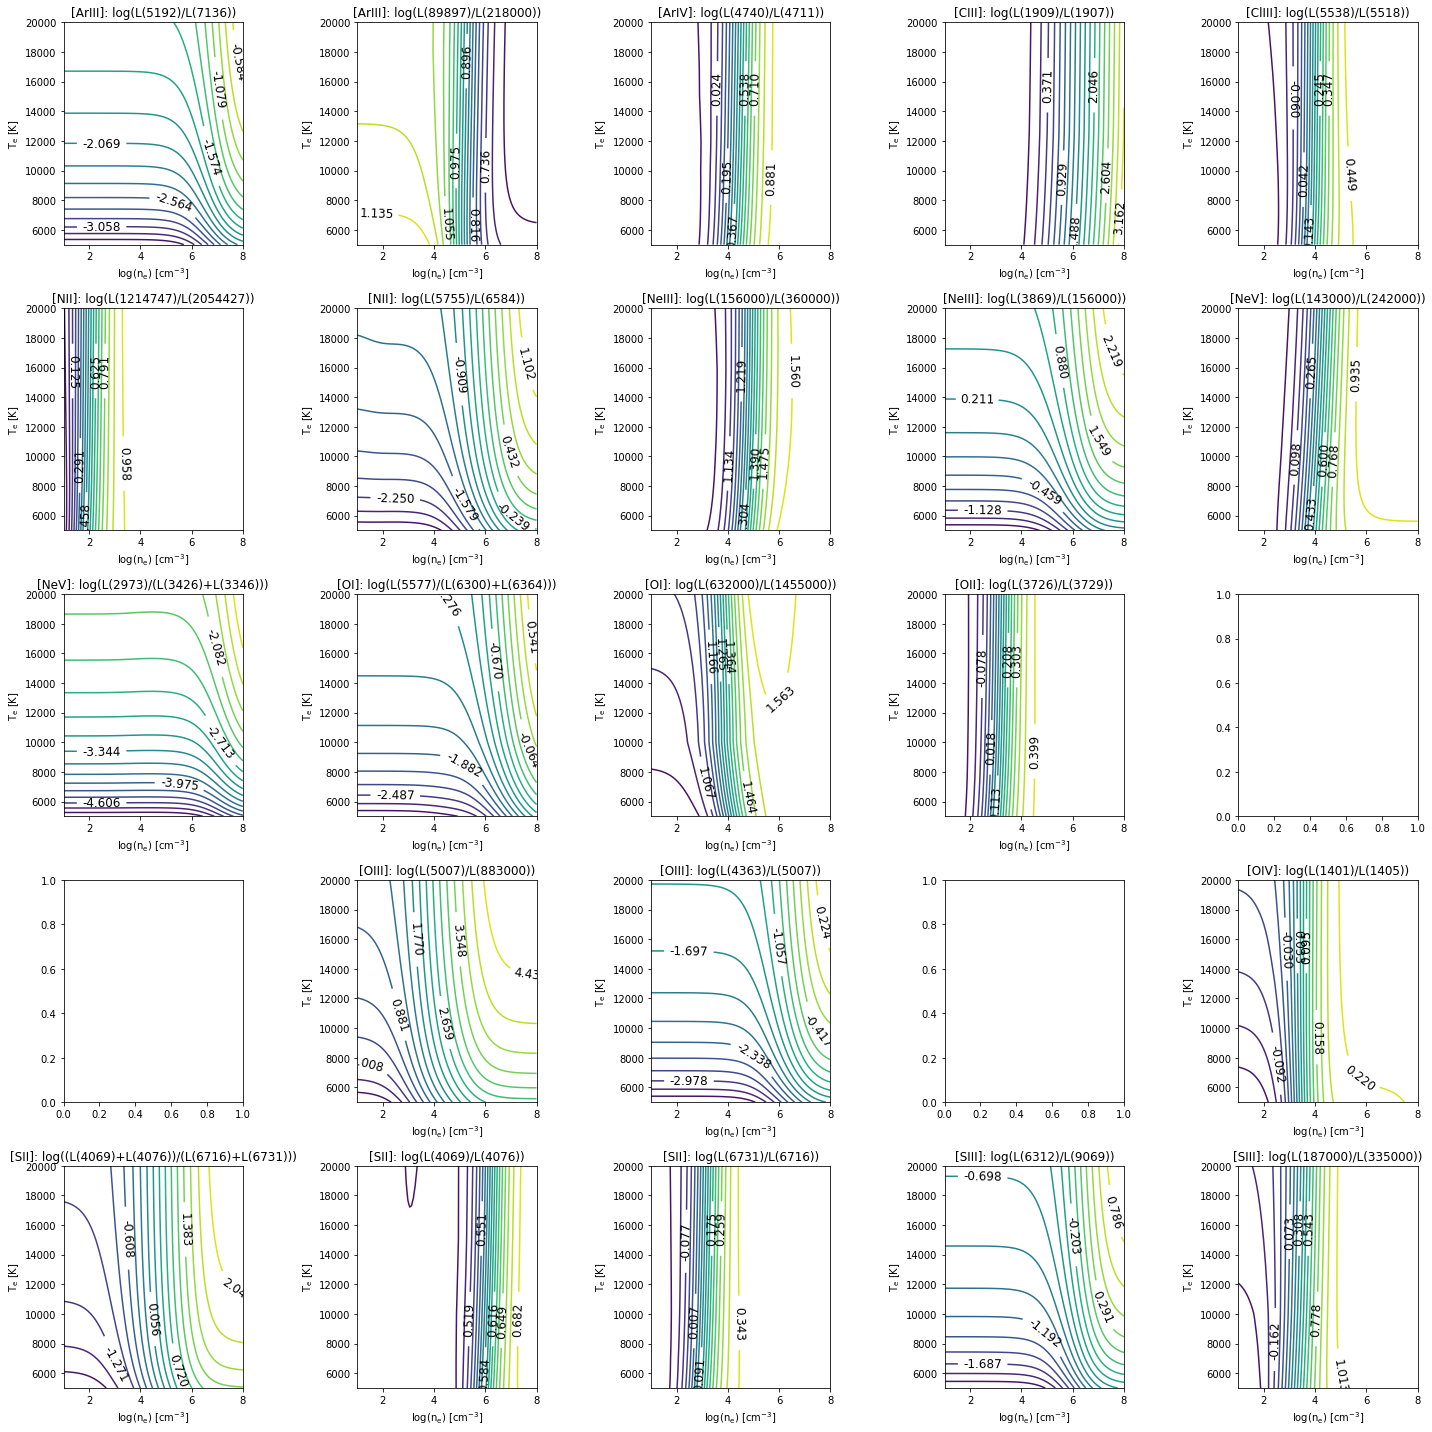

In [33]:
# Select a maximum of 25 diagnostics
diags = ['[ArIII] 5192/7136', 
         '[ArIII] 9.0m/21.8m',
         '[ArIV] 4740/4711',
         '[CIII] 1909/1907',
         '[ClIII] 5538/5518',
         '[NII] 121m/20.5m',
         '[NII] 5755/6584',
         '[NeIII] 15.6m/36.0m',
         '[NeIII] 3869/15.6m',
         '[NeV] 14.3m/24.2m',
         '[NeV] 2973/3370+',
         '[OI] 5577/6300+',
         '[OI] 63m/147m',
         '[OII] 3726/3729',
         '[OII] 3727+/7325+',
         '[OIII] 1664+/5007',
         '[OIII] 5007/88m', 
         '[OIII] 4363/5007',
         '[OIV] 1400+/25.9m',
         '[OIV] 1401/1405',
         '[SII] 4072+/6720+',
         '[SII] 4069/4076', 
         '[SII] 6731/6716',
         '[SIII] 6312/9069',
         '[SIII] 18.7m/33.5m'
         ] 
# Build the 25 subplots
f, axes = plt.subplots(5, 5, figsize=(20,20))
# loop on the diagnostics
for i, d in enumerate(diags):
    # extract from the diagnostic dictionnary 
    # the expression to be evaluated
    to_eval = pn.diags_dict[d][1]
    atom = pn.diags_dict[d][0]
    # split e.g. obtain 'O', 3 from 'O3'
    elem, spec = pn.utils.misc.parseAtom(atom)
    # instantiate the EmisGrid object for the given ion 
    EG = pn.EmisGrid(elem, spec)
    # select the axis in which to plot
    ax = axes.ravel()[i]
    # make the plot
    EG.plotContours(to_eval = to_eval, ax=ax)
# Make the plot nicer
f.tight_layout()
# Save the result in a pdf file
f.savefig('Diagnostics.pdf')

## Observation object

We ccreate a file with observations and uncertainties. These latests are a kind of mean between

In [17]:
%%writefile observations1.dat
LINE   MYOBJECT errMYOBJECT
S4_10.5m   7.00  0.25
Ne2_12.8m  8.30  0.25
Ne3_15.6m 34.10  0.20
S3_18.7m  10.00  0.20
O2_3726A  39.70  0.05
O2_3729A  18.60  0.05
Ne3_3869A 18.90  0.05
Ne3_3968A  6.4   0.10
S2_4069A   0.85  0.15
S2_4076A   0.45  0.15
O3_4363A   4.36  0.10
H1r_4861A 100.0  0.00
O3_5007A 435.09  0.05
N2_5755A   0.51  0.15
S3_6312A   0.76  0.15
O1_6300A   1.69  0.15
O1_6364A   0.54  0.15
N2_6548A   6.84  0.10
H1r_6563A 345.0  0.05
N2_6584A  19.00  0.10
S2_6716A   1.22  0.15
S2_6731A   2.18  0.15
Ar3_7136A  4.91  0.15
O2_7319A+  6.54  0.10
O2_7330A+  5.17  0.10

Overwriting observations1.dat


In [18]:
pn.log_.level = 3
obs = pn.Observation('observations1.dat', fileFormat='lines_in_rows_err_cols', corrected=False) # fill obs with data read from smc_24.dat

     Observation: adding line S4_10.5m
     Observation: adding line Ne2_12.8m
     Observation: adding line Ne3_15.6m
     Observation: adding line S3_18.7m
     Observation: adding line O2_3726A
     Observation: adding line O2_3729A
     Observation: adding line Ne3_3869A
     Observation: adding line Ne3_3968A
     Observation: adding line S2_4069A
     Observation: adding line S2_4076A
     Observation: adding line O3_4363A
     Observation: adding line H1r_4861A
     Observation: adding line O3_5007A
     Observation: adding line N2_5755A
     Observation: adding line S3_6312A
     Observation: adding line O1_6300A
     Observation: adding line O1_6364A
     Observation: adding line N2_6548A
     Observation: adding line H1r_6563A
     Observation: adding line N2_6584A
     Observation: adding line S2_6716A
     Observation: adding line S2_6731A
     Observation: adding line Ar3_7136A
     Observation: adding line O2_7319A+
     Observation: adding line O2_7330A+


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4455: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_tab = np.genfromtxt(obsFile, dtype=None, delimiter=delimiter, names=True)


In [19]:
obs.printIntens(returnObs=True) # return_obs is used to print out the original observaions (redenned)

S4_10.5m      7.000
Ne2_12.8m     8.300
Ne3_15.6m    34.100
S3_18.7m     10.000
O2_3726A     39.700
O2_3729A     18.600
Ne3_3869A    18.900
Ne3_3968A     6.400
S2_4069A      0.850
S2_4076A      0.450
O3_4363A      4.360
H1r_4861A   100.000
O3_5007A    435.090
N2_5755A      0.510
S3_6312A      0.760
O1_6300A      1.690
O1_6364A      0.540
N2_6548A      6.840
H1r_6563A   345.000
N2_6584A     19.000
S2_6716A      1.220
S2_6731A      2.180
Ar3_7136A     4.910
O2_7319A+     6.540
O2_7330A+     5.170


In [20]:
obs.extinction.law = 'CCM89'  # define the extinction law from Cardelli et al.
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85) # Compute theredenning correction
obs.correctData(normWave=4861)                      # Correct the data from attenuation

In [21]:
print(obs.extinction.E_BV)
print(obs.extinction.cHbeta)

[0.19310511]
[0.27875894]


In [22]:
obs.printIntens()

S4_10.5m      3.684
Ne2_12.8m     4.368
Ne3_15.6m    17.946
S3_18.7m      5.263
O2_3726A     48.822
O2_3729A     22.865
Ne3_3869A    22.782
Ne3_3968A     7.594
S2_4069A      0.991
S2_4076A      0.524
O3_4363A      4.799
H1r_4861A   100.000
O3_5007A    424.652
N2_5755A      0.453
S3_6312A      0.641
O1_6300A      1.428
O1_6364A      0.454
N2_6548A      5.658
H1r_6563A   285.000
N2_6584A     15.668
S2_6716A      0.995
S2_6731A      1.775
Ar3_7136A     3.862
O2_7319A+     5.064
O2_7330A+     4.000


## Diagnostic diagrams

In [23]:
pn.log_.level = 3
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)
for d in diags.diags:
    print(d, ':', diags.diags[d][1])

     Atom N2: Making atom object for N 2
     Atom N2: Reading atom data from n_ii_atom_FFT04.dat
     getLevelsNIST: Reading energies and stat weights from n_ii_levels.dat
     Atom N2: Reading coll data from n_ii_coll_T11.dat
     Diagnostics: Adding diag [NII] 5755/6548
     Diagnostics: Adding diag [NII] 5755/6584
     Diagnostics: Adding diag [NII] 5755/6584+
     Atom O2: Making atom object for O 2
     Atom O2: Reading atom data from o_ii_atom_FFT04.dat
     getLevelsNIST: Reading energies and stat weights from o_ii_levels.dat
     Atom O2: Reading coll data from o_ii_coll_Kal09.dat
     Diagnostics: Adding diag [OII] 3726/3729
warng Observation: No line for O2_3727A+ from NoneNone at wavelength None (blend=False)
     Diagnostics: Adding diag [OII] 3727+/7325+
     Atom O3: Making atom object for O 3
     Atom O3: Reading atom data from o_iii_atom_FFT04-SZ00.dat
     getLevelsNIST: Reading energies and stat weights from o_iii_levels.dat
     Atom O3: Reading coll data from o_ii

In [24]:
# Clean the list of diagnostics from redundant line ratios
for d in ('[NII] 5755/6584', '[NII] 5755/6584+', '[NeIII] 3930+/15.6m'):
    try:
        del diags.diags[d]
    except:
        pass

Plot the diagnostic diagram

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:600: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, diag_map, levels=[diag_value], colors=col, linestyles=style)


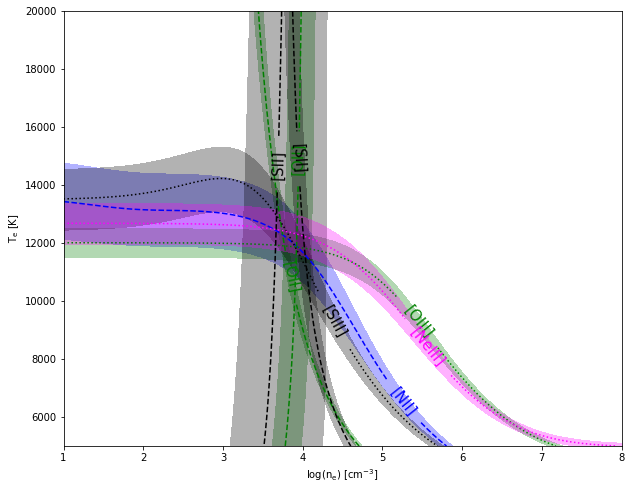

In [25]:
pn.log_.level = 2
f, ax = plt.subplots(figsize=(10, 8))
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
diags.plot(emisgrids, obs, ax=ax)

## Determine Te and Ne

In [26]:
O3.getTemDen(150., den=100., wave1=5007, wave2=4363, maxError=1.e-2)

10070.1086130086

In [27]:
S2.getTemDen(1.57, tem=12500, to_eval="I(2,1) / I(3,1)")

2696.0439464741175

## Determine Te and Ne at the same time

In [28]:
t, d = diags.getCrossTemDen(diag_tem='[OIII] 4363/5007', diag_den='[SII] 6731/6716', obs=obs)

In [29]:
print('Te = {:.0f} K, Ne = {:.0f} cm-3'.format(t,d))

Te = 11927 K, Ne = 4571 cm-3


In [30]:
t2, d2 = diags.getCrossTemDen(diag_tem='[NII] 5755/6584', diag_den='[SII] 6731/6716', obs=obs)
print('Te = {:.0f} K, Ne = {:.0f} cm-3'.format(t2,d2))

Te = 12819 K, Ne = 4697 cm-3


In [31]:
t3, d3 = diags.getCrossTemDen(diag_tem='[NeIII] 3869/15.6m', diag_den='[SII] 6731/6716', obs=obs)
print('Te = {:.0f} K, Ne = {:.0f} cm-3'.format(t3,d3))

Te = 12466 K, Ne = 4648 cm-3


The Te-Ne to be used to determine the ionic abundances depends on the IP of the corresponding element

In [32]:
pn.print_IPs(N_elems=20, N_ions=8)

H      13.60
He     24.59  54.42
Li      5.39  75.64 122.45
Be      9.32  18.21 153.90 217.72
B       8.30  25.15  37.93 259.37 340.23
C      11.26  24.38  47.89  64.49 392.09 489.99
N      14.53  29.60  47.45  77.47  97.89 552.07 667.05
O      13.62  35.12  54.94  77.41 113.90 138.12 739.33 871.41
F      17.42  34.97  62.71  87.17 114.25 157.16 185.19 953.90
Ne     21.56  40.96  63.42  97.19 126.25 157.93 207.27 239.10
Na      5.14  47.29  71.62  98.94 138.40 172.23 208.50 264.19
Mg      7.65  15.04  80.14 109.27 141.34 186.76 225.01 265.92
Al      5.99  18.83  28.45 119.99 153.83 190.49 241.76 284.64
Si      8.15  16.35  33.49  45.14 166.77 205.27 246.32 303.66
P      10.49  19.77  30.20  51.44  65.03 220.43 263.57 309.60
S      10.36  23.34  34.86  47.22  72.59  88.05 280.95 328.79
Cl     12.97  23.81  39.80  53.24  67.68  96.94 114.20 348.31
Ar     15.76  27.63  40.73  59.58  74.84  91.29 124.41 143.46
K       4.34  31.62  45.80  60.92  82.66  99.40 117.56 154.87
Ca      6.11  11.8

The getTemDen and getCrossTemDen are vectorized. Theye are even parallelized and to use multiplrocessor, one just have to do:

In [39]:
pn.config.use_multiprocs() # pn.config.unuse_multiprocs()
print('Using {} procs.'.format(pn.config.Nprocs))

Using 12 procs.


If there is a huge number of data to deal with, one can use an Artificial Neural Network. This is already implemented in PyNeb, but test and validation of the hyperparameters still need to be achieved.